In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [40]:
df['Size'].apply(lambda x: x[-1]).value_counts()

M    8829
e    1695
k     316
+       1
Name: Size, dtype: int64

In [21]:
df['Size'].apply(lambda x: x if 'c' in x else None).unique()

array([None, 'Varies with device'], dtype=object)

In [35]:
df['Size'].apply(lambda x: x if 'ce' in x else -1).value_counts()

-1                    9146
Varies with device    1695
Name: Size, dtype: int64

In [39]:
df[df['Size'].apply(lambda x: 'ce' in x)]['Category'].value_counts()

FAMILY                 140
GAME                   129
COMMUNICATION          122
PRODUCTIVITY           121
TOOLS                  104
SOCIAL                  85
PHOTOGRAPHY             81
HEALTH_AND_FITNESS      77
SPORTS                  73
NEWS_AND_MAGAZINES      67
TRAVEL_AND_LOCAL        66
BUSINESS                60
SHOPPING                59
FINANCE                 59
ENTERTAINMENT           59
EDUCATION               45
VIDEO_PLAYERS           44
LIFESTYLE               37
PERSONALIZATION         37
BOOKS_AND_REFERENCE     34
MAPS_AND_NAVIGATION     29
MEDICAL                 29
FOOD_AND_DRINK          27
WEATHER                 25
DATING                  22
HOUSE_AND_HOME          20
AUTO_AND_VEHICLES       10
COMICS                   9
EVENTS                   7
PARENTING                6
BEAUTY                   6
LIBRARIES_AND_DEMO       3
ART_AND_DESIGN           3
Name: Category, dtype: int64

In [5]:
def str_to_int(size):
    """
    Scaling and cleaning size of installation.
    :param size:
    :return:
    """
    if "M" in size:
        x = size[:-1]
        x = float(x) * 1000000
        return x
    elif "k" == size[-1:]:
        x = size[:-1]
        x = float(x) * 1000
        return x
    else:
        return None    # was None but linters can't accept it


df["Size"] = df["Size"].map(str_to_int)  # about 10% will be None
df['Size'].mean()
df['Size'].median()

13000000.0

<AxesSubplot:>

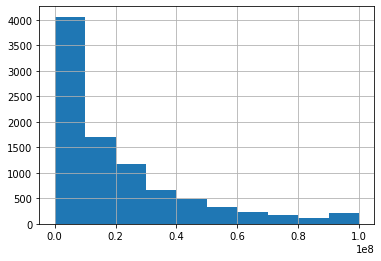

In [6]:
df['Size'].hist()

In [52]:
df["Size"].fillna(13000000, inplace=True)

In [59]:
df['Installs'].apply(lambda x: x[-5:]).value_counts()

,000+    9036
100+      719
10+       386
500+      330
50+       205
5+         82
1+         67
0+         14
0           1
Free        1
Name: Installs, dtype: int64

In [4]:
df["Reviews"].apply(lambda x: x[-1:]).value_counts()

0    1535
1    1151
3    1117
2    1060
5    1054
4    1013
6     997
8     988
7     981
9     944
M       1
Name: Reviews, dtype: int64

In [17]:
df["Reviews"].dtype == 'object'

True

In [15]:
df["Rating"].dtype == 'float64'

True

In [19]:
type(2.)

float

In [17]:
df['Price'].apply(lambda x: x if x[-1] == 'M' else 0).value_counts()

0    10841
Name: Price, dtype: int64

In [8]:
var = train_test_split(df, test_size=0.8)

In [9]:
print(type(var))
print(len(var))

<class 'list'>
2


In [11]:
var[0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5827,Ay,VIDEO_PLAYERS,3.8,11,3.6M,"5,000+",Free,0,Teen,Video Players & Editors,"May 4, 2018",1.0.261,2.3 and up
1163,Google Pay,FINANCE,4.2,347874,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
4488,pretty Easy privacy p≡p,COMMUNICATION,3.7,21,20M,500+,Paid,$0.99,Everyone,Communication,"July 30, 2018",1.0.100rc1.withoutKeysync,5.0 and up
8571,Interactive NPC DM Tool,FAMILY,2.8,5,629k,50+,Paid,$0.99,Everyone,Role Playing,"January 31, 2015",1.0.0,2.3.3 and up
10084,EY Tax Briefing,BUSINESS,NaN,3,15M,100+,Free,0,Everyone,Business,"March 21, 2018",1.0,4.1 and up


In [25]:
df.drop(labels=["Rating"], axis=1)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [28]:
import pickle